In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../test_predictions_15.csv')
df.head()

,id_code,0,1,2,3,4,diagnosis,target
0,000c1434d8d7,3.0,3.0,3.0,4.0,3.0,3,2
1,001639a390f0,4.0,4.0,4.0,4.0,4.0,4,4
2,0024cdab0c1e,0.0,1.0,1.0,1.0,1.0,1,1
3,002c21358ce6,0.0,0.0,0.0,0.0,0.0,0,0
4,005b95c28852,1.0,0.0,0.0,1.0,0.0,0,0


In [4]:
df['avg'] = df[['0', '1', '2', '3', '4']].mean(axis=1)

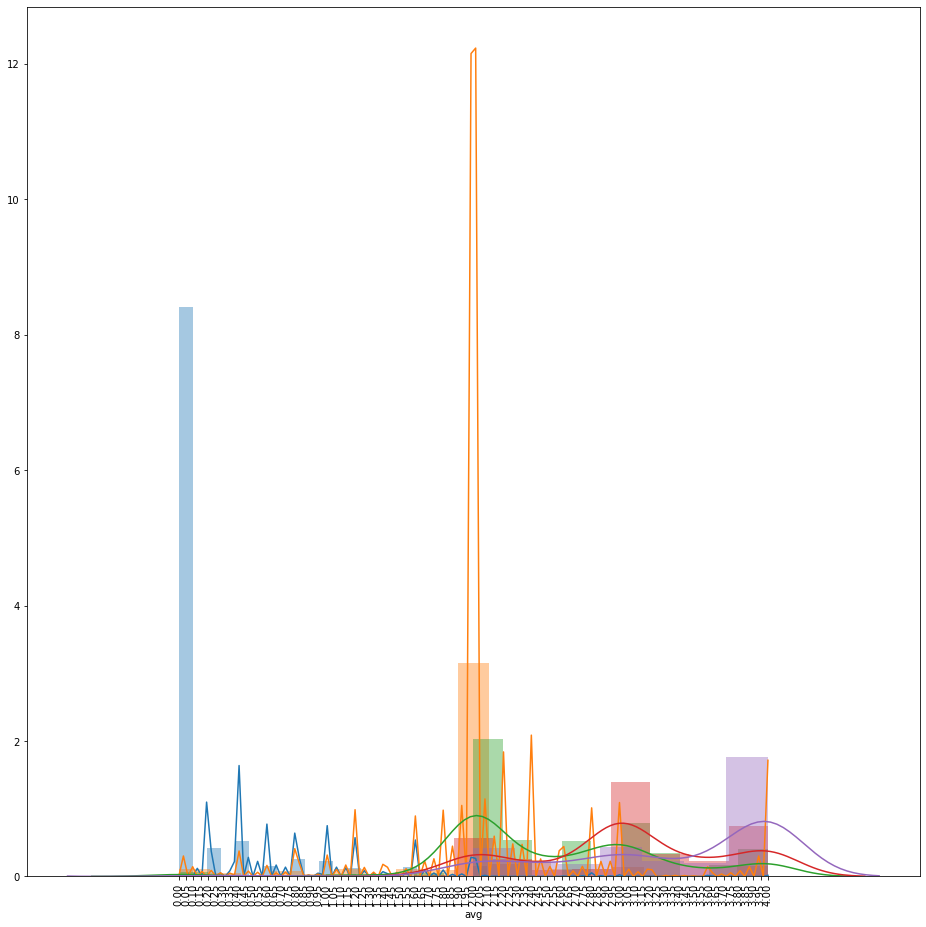

In [5]:
fig, ax = plt.subplots(figsize=(16, 16))

for c in range(5):
    sns.distplot(df.loc[df['target'] == c, 'avg'], kde=True, ax=ax)

plt.xticks(np.arange(0, 4.05, 0.05), rotation=90)
plt.savefig('pred_plot_15.png', dpi=300)

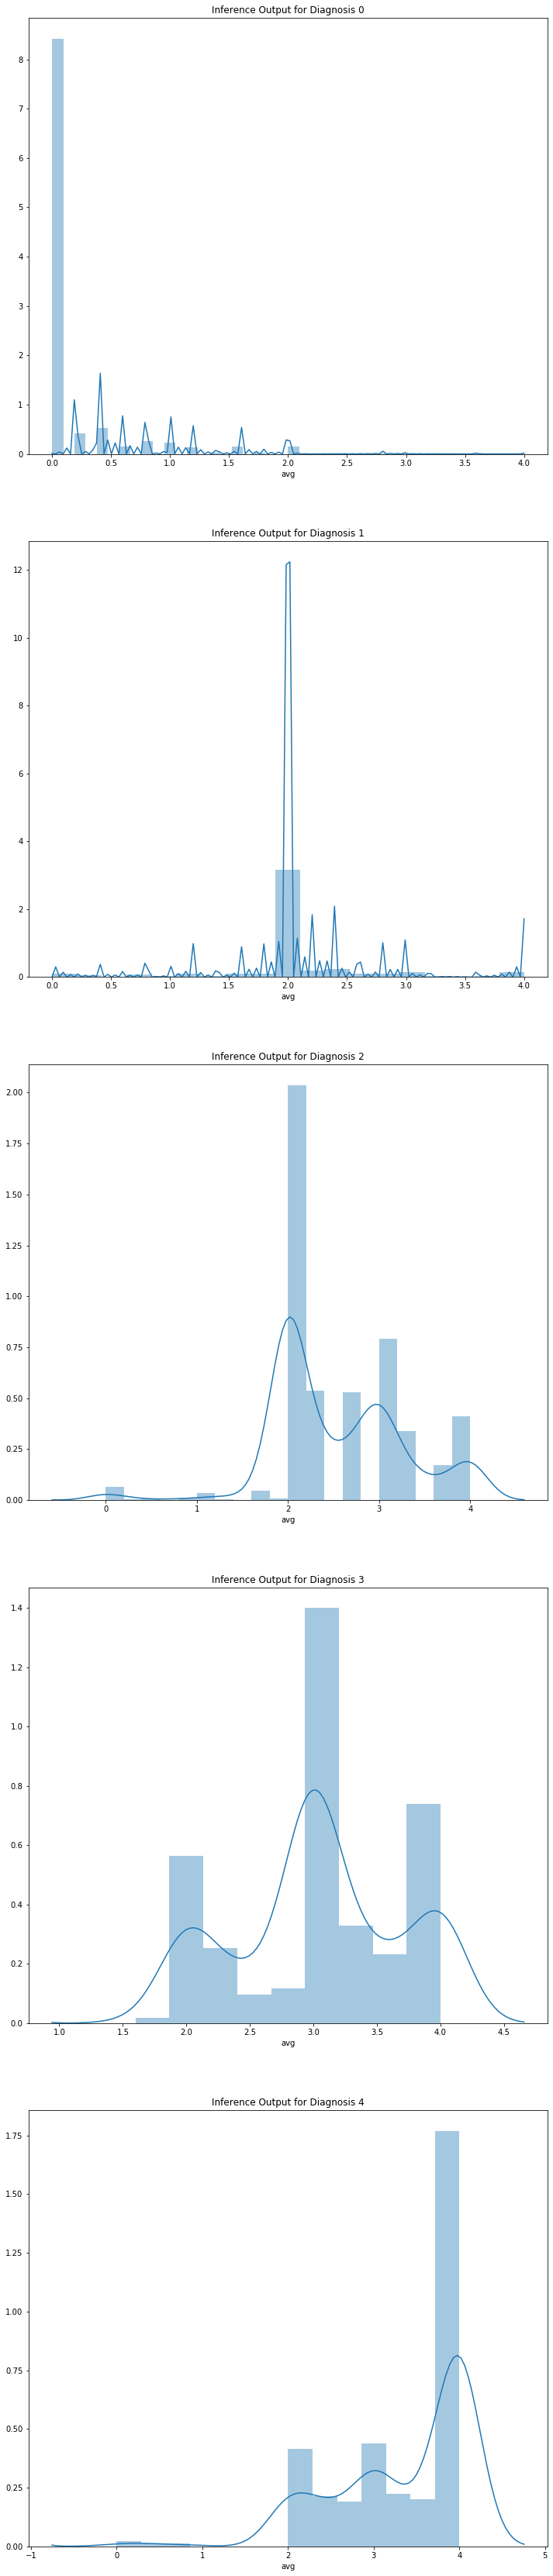

In [6]:
fig, axs = plt.subplots(5, figsize=(12, 60))

for c in range(5):
    sns.distplot(df.loc[df['target'] == c, 'avg'], kde=True, ax=axs[c])
    axs[c].set_title(f'Inference Output for Diagnosis {c}')

In [7]:
def recalibrate(pred):
    if pred < 0.9:
        return 0
    if pred < 1.85:
        return 1
    if pred < 2.7:
        return 2
    if pred < 3.25:
        return 3
    return 4

In [8]:
df['recalibrate'] = df['avg'].apply(recalibrate)

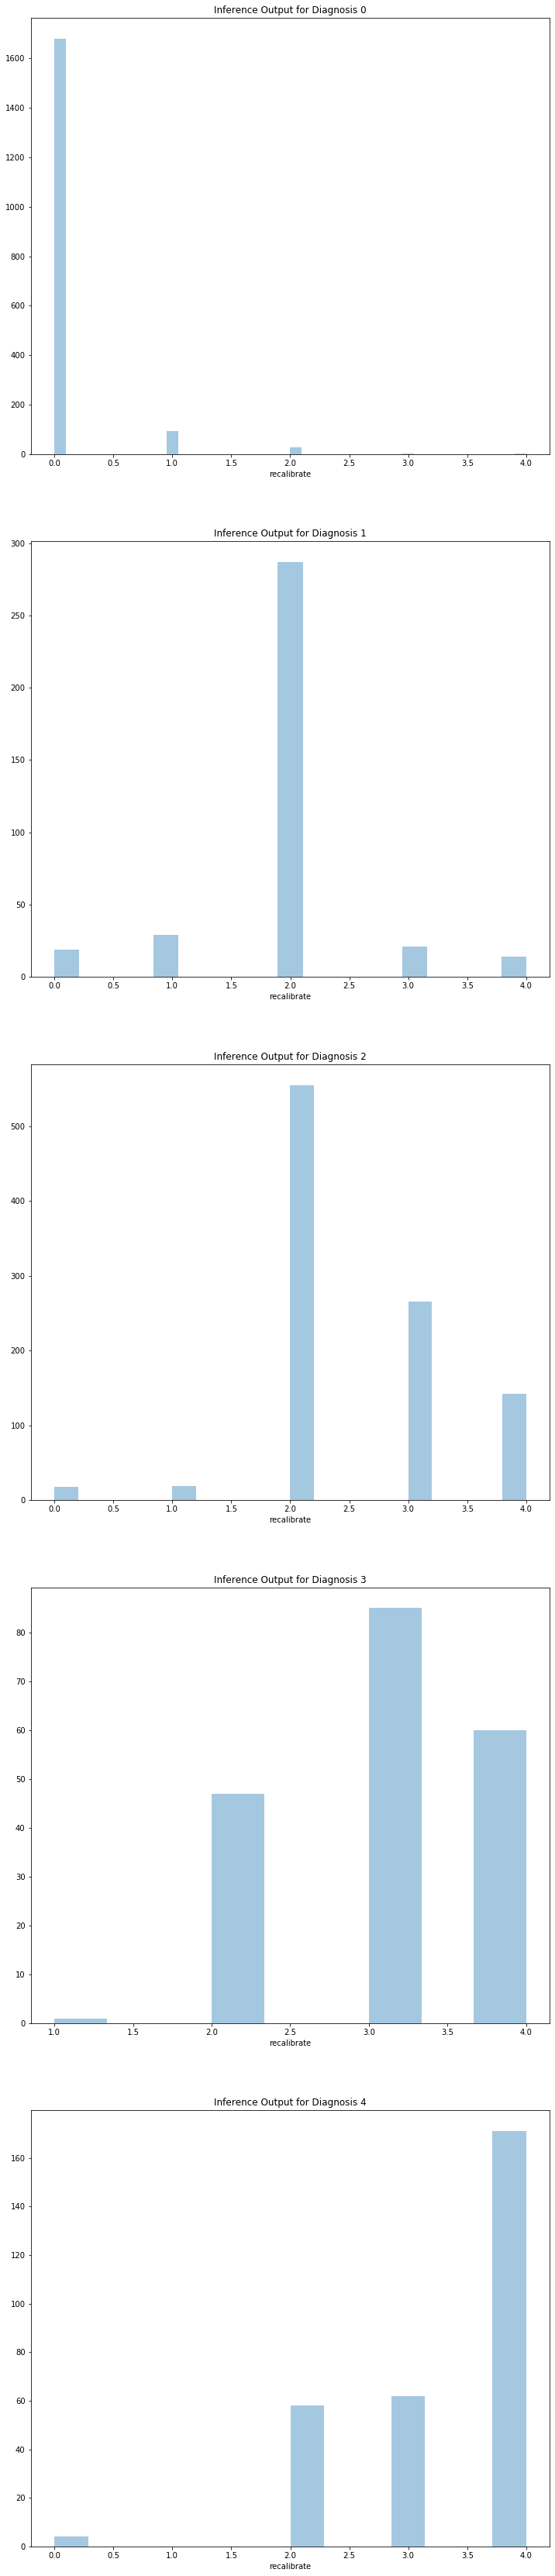

In [9]:
fig, axs = plt.subplots(5, figsize=(12, 60))

for c in range(5):
    sns.distplot(df.loc[df['target'] == c, 'recalibrate'], kde=False, ax=axs[c])
    axs[c].set_title(f'Inference Output for Diagnosis {c}')